In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/airline_passengers.csv')

In [ ]:
data.head(10)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [ ]:
data.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [ ]:
data.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
data.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
data.set_index('Month', inplace=True)

In [ ]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

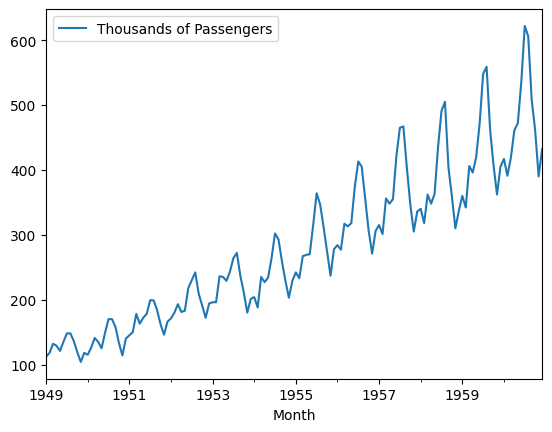

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result=adfuller(series)
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
    print('Reject Null Hypothesis, stationary')
  else:
    print('Fail to Reject Null Hypothesis, not stationary'
    )

In [ ]:
adf_test(data['Thousands of Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Fail to Reject Null Hypothesis, not stationary


In [ ]:
data['passengers first difference']= data['Thousands of Passengers']-data['Thousands of Passengers'].shift(1)

In [ ]:
data.head()

,Thousands of Passengers,passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [ ]:
data['passengers second difference']= data['passengers first difference']-data['passengers first difference'].shift(1)

In [ ]:
adf_test(data['passengers second difference'].dropna())

ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
Reject Null Hypothesis, stationary


In [ ]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

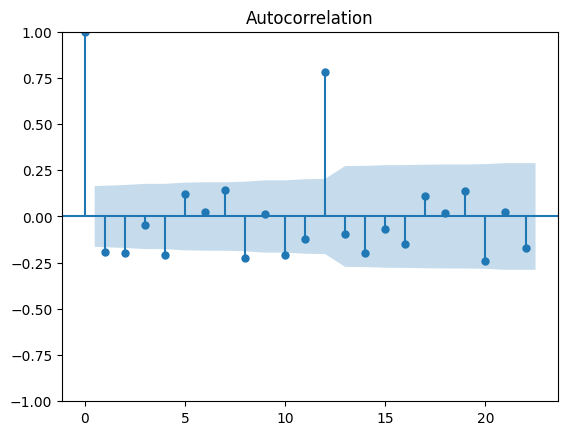

In [ ]:
acf = plot_acf(data['passengers second difference'].dropna())

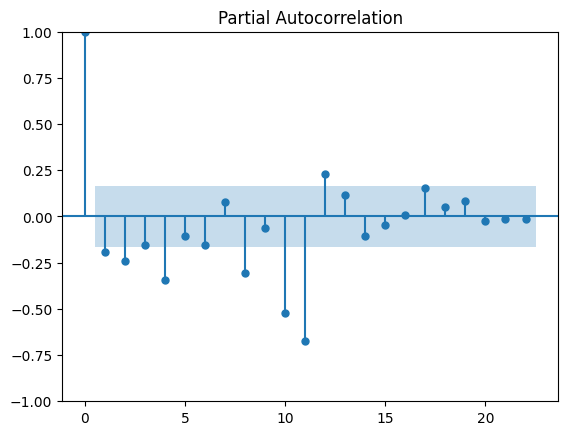

In [ ]:
result = plot_pacf(data['passengers second difference'].dropna())

In [ ]:
  from datetime import datetime, timedelta
  train_dataset_end = datetime(1955,12,1)
  test_dataset_end = datetime(1960,12,1)

In [ ]:
train_data = data[:train_dataset_end]
test_data = data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start = test_data.index[0]
pred_end = test_data.index[-1]

In [ ]:
test_data

,Thousands of Passengers,passengers first difference,passengers second difference
Month,,,
1956-01-01,284.0,6.0,-35.0
1956-02-01,277.0,-7.0,-13.0
1956-03-01,317.0,40.0,47.0
1956-04-01,313.0,-4.0,-44.0
1956-05-01,318.0,5.0,9.0
1956-06-01,374.0,56.0,51.0
1956-07-01,413.0,39.0,-17.0
1956-08-01,405.0,-8.0,-47.0
1956-09-01,355.0,-50.0,-42.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
train_data

,Thousands of Passengers,passengers first difference,passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1955-08-01,347.0,-17.0,-66.0
1955-09-01,312.0,-35.0,-18.0
1955-10-01,274.0,-38.0,-3.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(4,2,3))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_ARIMA_fit = model_ARIMA.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(4, 2, 3)   Log Likelihood                -355.974
Date:                     Fri, 16 Jan 2026   AIC                            727.949
Time:                             17:37:50   BIC                            747.202
Sample:                         01-01-1949   HQIC                           735.679
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3329      0.134     -2.490      0.013      -0.595      -0.071
ar.L2         -0.8534      0.134     -6.368      0.000      -1.116      -0.591
ar.L3          0.1164      0.135      0.864      0.387      -0.148       0.380
ar.L4         -0.4245      0.134     -3.164      0.002      -0.687      -0.162
ma.L1         -0.2988     35.621     -0.008      0.993     -70.115      69.517
ma.L2          0.2859     24.973      0.011      0.991     -48.660      49.232
ma.L3         -0.9869     35.219     -0.028      0.978     -70.015      68.042
sigma2       306.4908   1.09e+04      0.028      0.978   -2.11e+04    2.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.60   Prob(JB):                         0.77
Heteroskedasticity (H):               3.64   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred = model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [ ]:
residuals

,0
Month,
1956-01-01,-18.949169
1956-02-01,-16.265315
1956-03-01,16.120610
1956-04-01,15.689638
1956-05-01,32.514415
1956-06-01,71.330937
1956-07-01,104.404396
1956-08-01,107.699814
1956-09-01,46.773873


<Axes: ylabel='Density'>

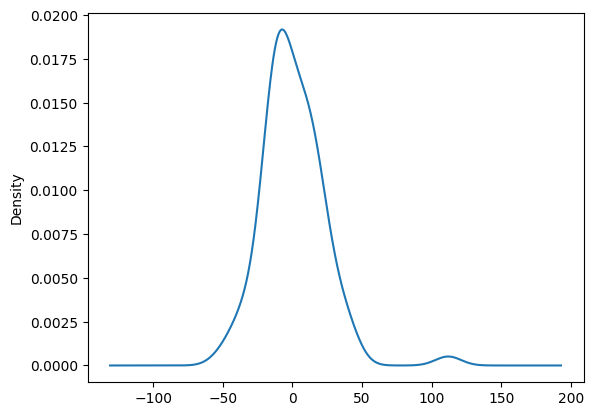

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['predicted_arima']=pred

/tmp/ipython-input-931718042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_arima']=pred


<Axes: xlabel='Month'>

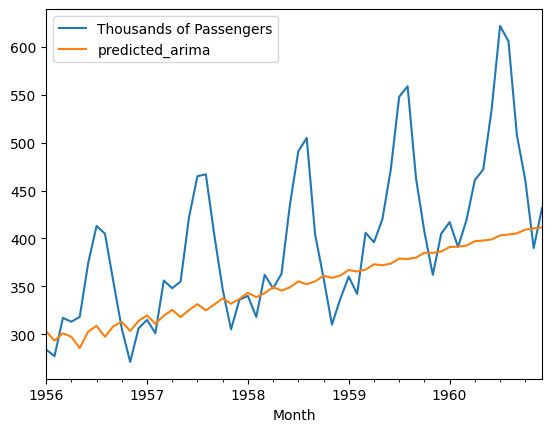

In [ ]:
test_data[['Thousands of Passengers','predicted_arima']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SARIMA_fit = model_SARIMAX.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 16 Jan 2026   AIC                            548.480
Time:                                     17:39:28   BIC                            568.970
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5974      0.937      0.637      0.524      -1.240       2.434
ar.L2          0.8310      0.232      3.584      0.000       0.377       1.285
ar.L3         -0.4516      0.893     -0.505      0.613      -2.203       1.299
ma.L1          0.1847      1.167      0.158      0.874      -2.103       2.472
ma.L2         -0.5333      1.265     -0.422      0.673      -3.012       1.945
ma.L3         -0.0988      0.385     -0.256      0.798      -0.854       0.656
ma.L4         -0.1275      0.339     -0.376      0.707      -0.792       0.537
ma.L5          0.2470      0.358      0.691      0.490      -0.454       0.948
sigma2        87.7349     81.586      1.075      0.282     -72.170     247.640
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred_sarima = model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred_sarima

<Axes: ylabel='Density'>

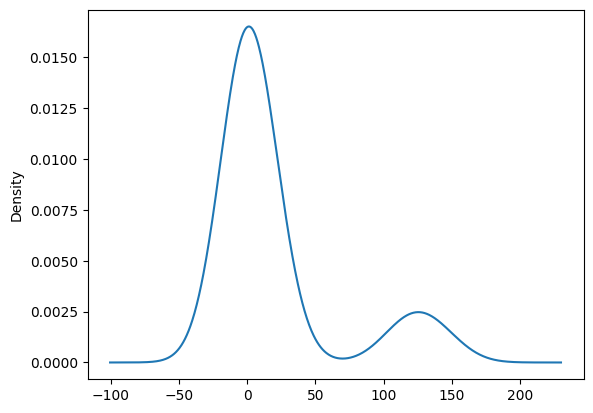

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['predicted_sarima']=pred_sarima

/tmp/ipython-input-3039080943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_sarima']=pred_sarima


<Axes: xlabel='Month'>

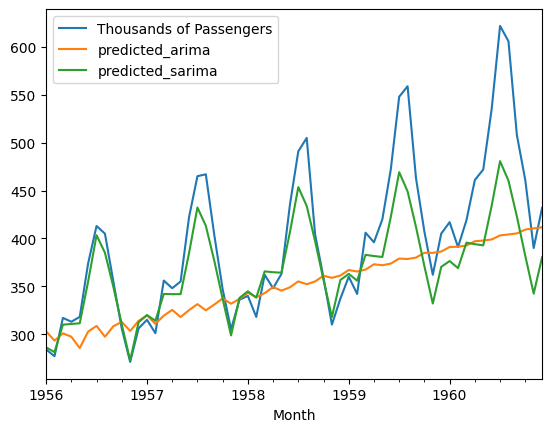

In [ ]:
test_data[['Thousands of Passengers', 'predicted_arima', 'predicted_sarima']].plot()